# Swipe Data

Seperate table per servery (south, baker, siebel, north, west)

cols: time (15 min intervals), swipes

In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [14]:
def generate_random(start_time, end_time):
    times = pd.date_range(start=start_time, end=end_time, freq='15min')
    # have a check such that times are between 7:30am to 8:00pm
    times = times[(times.time >= pd.Timestamp('07:30:00').time()) & 
                  (times.time <= pd.Timestamp('20:00:00').time())]

    #swipes = [random.randint(3500, 4000) for _ in range(len(times))]
    swipes = []
    for time in times:
        if time.weekday() >= 5:  # Weekend
            swipe_count = random.randint(2000, 3500)
        elif time.time() >= pd.Timestamp('11:30:00').time() and time.time() <= pd.Timestamp('13:30:00').time():  # Lunch time
            swipe_count = random.randint(3500, 4000)
        elif time.time() >= pd.Timestamp('17:30:00').time() and time.time() <= pd.Timestamp('19:30:00').time():  # Dinner time
            swipe_count = random.randint(3750, 4200)
        else:  # Other times
            swipe_count = random.randint(2000, 4000)
        swipes.append(swipe_count)
    
    # Create a DataFrame
    df = pd.DataFrame({
        'time': times,
        'swipes': swipes
    })
    
    return df

south_df = generate_random('2025-01-01 00:00:00', '2025-03-01 03:00:00')
south_df

,time,swipes
0,2025-01-01 07:30:00,2724
1,2025-01-01 07:45:00,3431
2,2025-01-01 08:00:00,3401
3,2025-01-01 08:15:00,2756
4,2025-01-01 08:30:00,2508
...,...,...
3004,2025-02-28 19:00:00,4014
3005,2025-02-28 19:15:00,4083
3006,2025-02-28 19:30:00,3844
3007,2025-02-28 19:45:00,3345


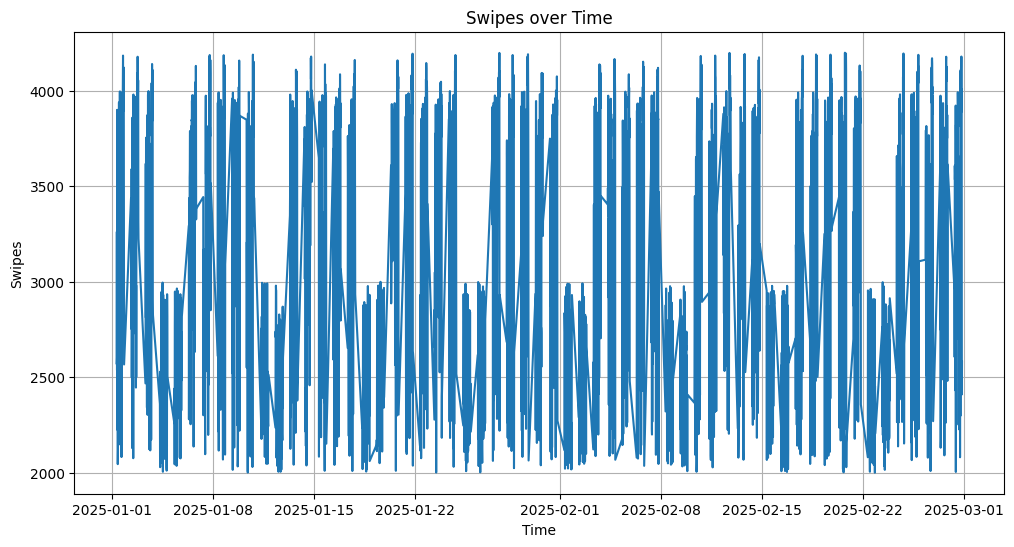

In [13]:
# visualizations
plt.figure(figsize=(12, 6))
plt.plot(south_df['time'], south_df['swipes'], label='Swipes')
plt.xlabel('Time')
plt.ylabel('Swipes')
plt.title('Swipes over Time')
plt.grid(True)
plt.show()
